Let's import the necessary libraries and set some global parameters

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [4]:
warnings.filterwarnings('ignore')

Here we use the famous __bike sharing__ dataset. To make things simpler we only use the following columns from this dataset: 
- __dteday__: date
- __hum__: Normalized humidity. The values are divided to 100 (max) 
- __atemp__: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale) 

You can learn more about this dataset [here](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

In [10]:
df = pd.read_csv('../data/Bike-Sharing-Dataset/day.csv',
                 sep=',',
                 parse_dates=['dteday'])

In [9]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


Here you see the final plot we're going to make together:

<img src="../images/all_final.png" height="900" >

## Histogram

Here we reconstruct the histogram you see in the plot above from scratch. starting from the basic form, we add required pieces to arrive to the desired plot.

<img src="../Images/histogram_final.png" height="300" width="700">

Basic histogram plot:

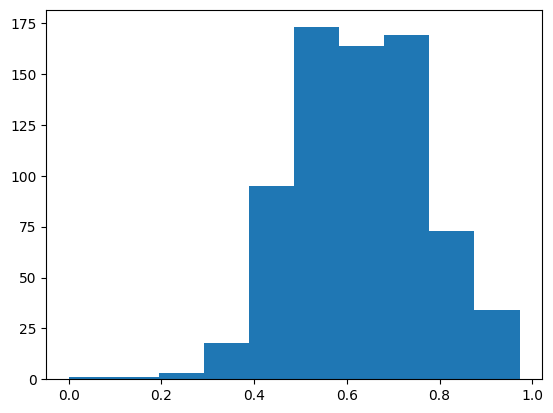

In [13]:
plt.hist(df.hum)
plt.show()

Changing the size:

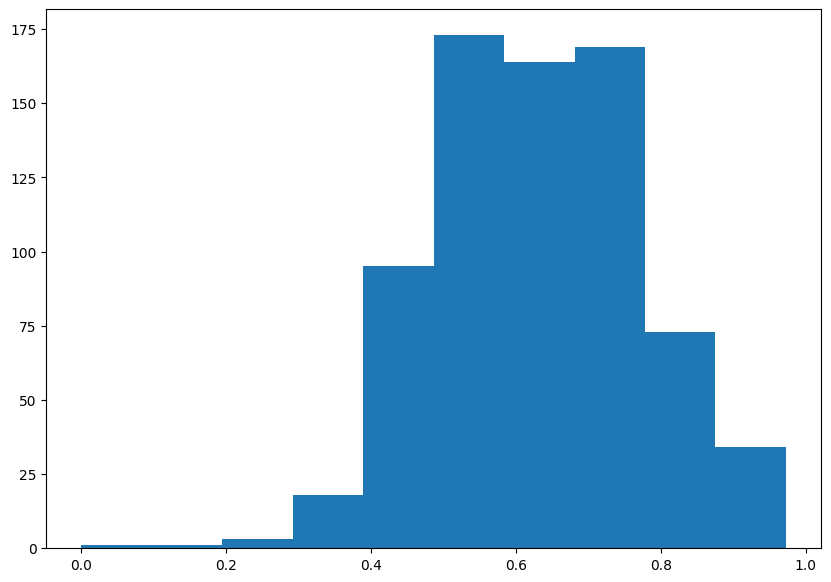

In [16]:
plt.figure(figsize=(10, 7))
plt.hist(df.hum)
plt.show()

Here we do these modifications:
- Changing number of bins from default value to 50
- Changing the color opaqueness from 1 to 0.3
- Setting black as the edge color
- Setting width of the border lines


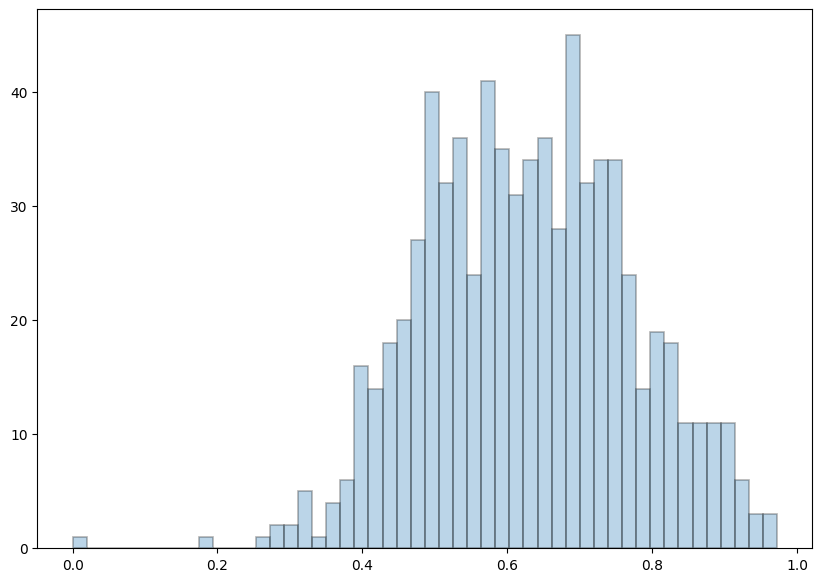

In [20]:
plt.figure(figsize=(10, 7))
plt.hist(df.hum, bins=50, alpha=0.3, edgecolor='black', linewidth=1.2)
plt.show()

Adding a title with the desired size and removing _Y_ ticks

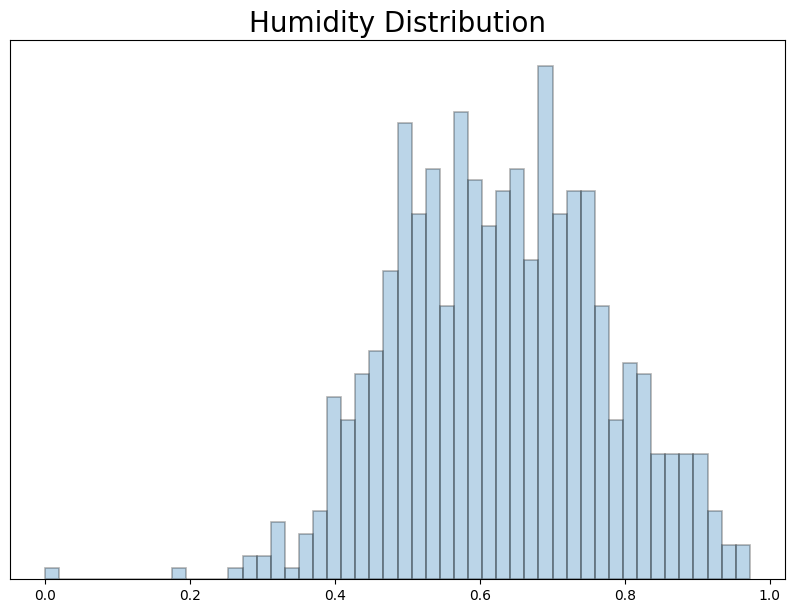

In [21]:
plt.figure(figsize=(10, 7))
plt.hist(df.hum, bins=50, alpha=0.3, edgecolor='black', linewidth=1.2)
plt.title('Humidity Distribution', fontsize=20)
plt.yticks([])
plt.show()

Adding a vertical blue line which indicates the mean of the data:

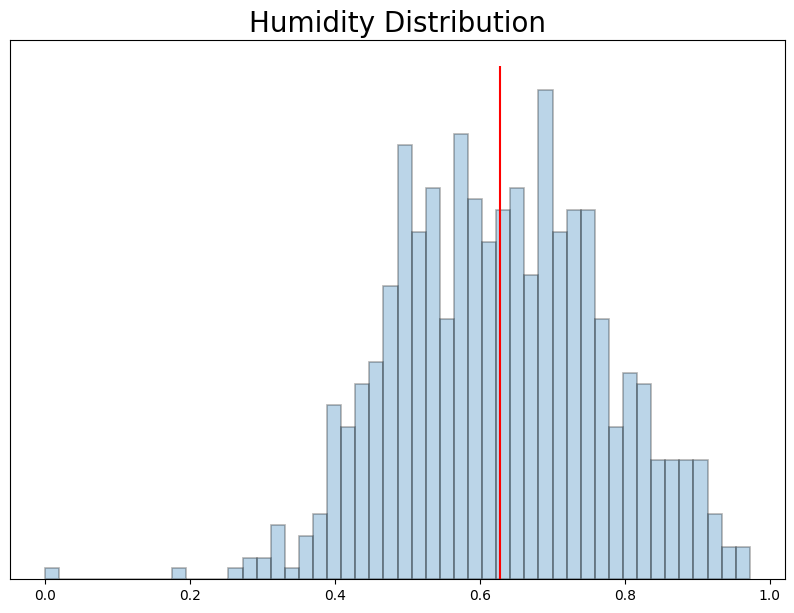

In [24]:
plt.figure(figsize=(10, 7))
plt.hist(df.hum, bins=50, alpha=0.3, edgecolor='black', linewidth=1.2)
plt.title('Humidity Distribution', fontsize=20)
xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(np.mean(df.hum), 0, ymax, 'r')
plt.yticks([])
plt.show()

Adding a text with a specific font, color and size to the plot:

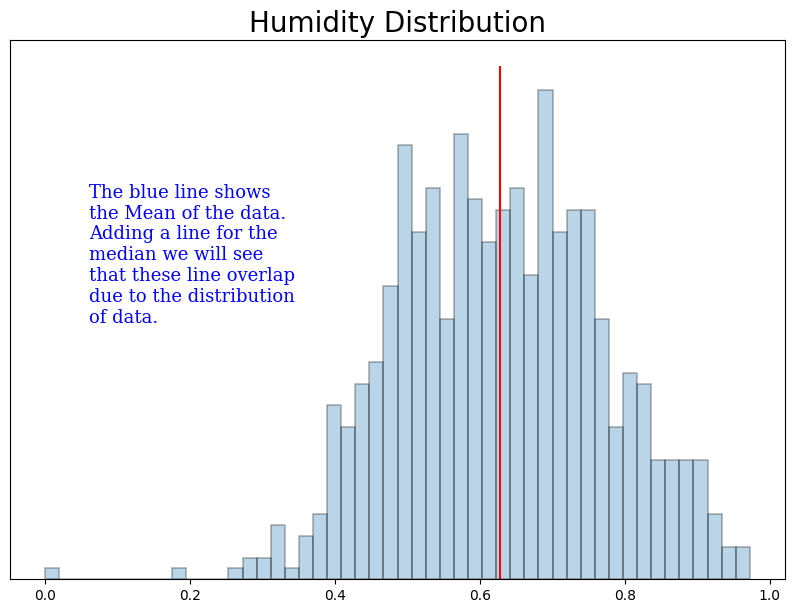

In [27]:
plt.figure(figsize=(10, 7))
plt.hist(df.hum, bins=50, alpha=0.3, edgecolor='black', linewidth=1.2)
plt.title('Humidity Distribution', fontsize=20)
xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(np.mean(df.hum), 0, ymax, 'r')
font = {
    'family': 'serif',
    'color': 'blue',
    'weight': 'normal',
    'size': 13,
}
plt.text(
    0.06,
    ymax * 0.5,
    f'The blue line shows\nthe Mean of the data.\nAdding a line for the\nmedian we will see\nthat these line overlap\ndue to the distribution\nof data.',
    fontdict=font)
plt.yticks([])
plt.show()

## Scatter plot

While in the previous case, we started from the basic for of the plot, here we use what we already learned in the previous section:
- Changing the size
- Adding a title
- Adding a vertical line
- Adding a text

<img src="../Images/scatter_final.png" height="300" width="700">

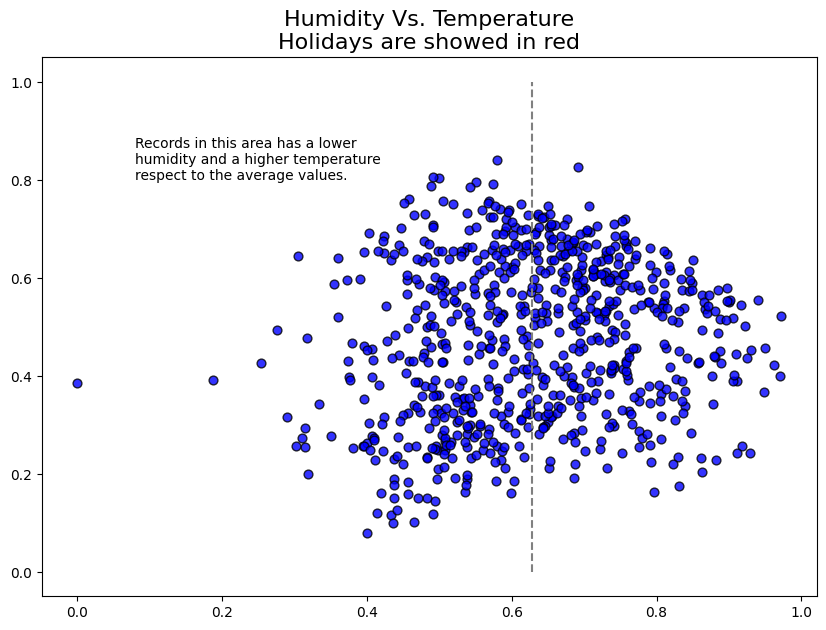

In [28]:
plt.figure(figsize=(10, 7))

plt.scatter(df.hum, df.atemp, c='b', alpha=0.8, edgecolors='k', s=40)

plt.title('Humidity Vs. Temperature\nHolidays are showed in red', fontsize=16)
plt.vlines(np.mean(df.hum), 0, 1, 'grey', linestyles='--')
plt.text(
    0.08, 0.8,
    'Records in this area has a lower\nhumidity and a higher temperature\nrespect to the average values.'
)
plt.show()

Here we these new things:
- Adding X label
- Adding Y label
- Adding a horizontal line

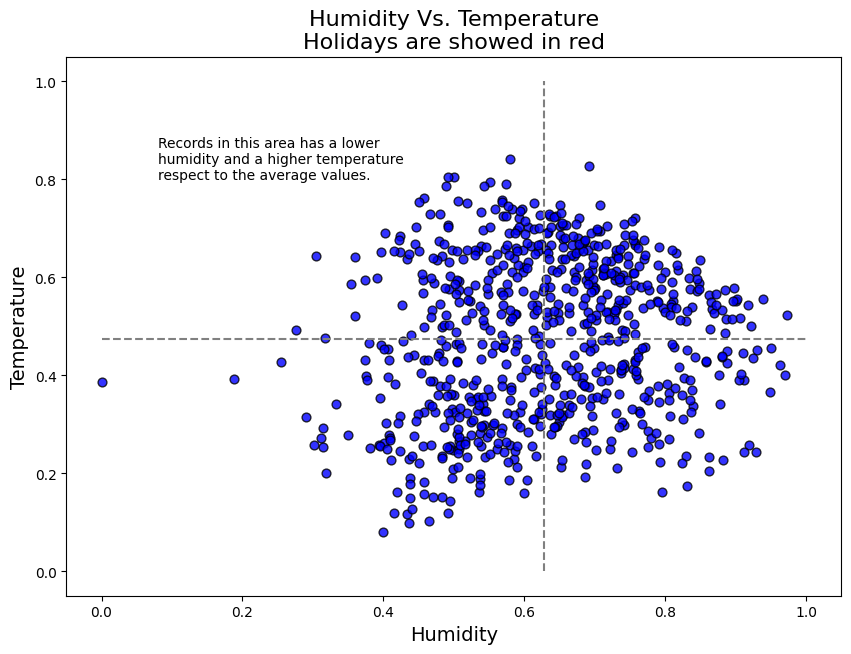

In [29]:
plt.figure(figsize=(10, 7))

plt.scatter(df.hum, df.atemp, c='b', alpha=0.8, edgecolors='k', s=40)

plt.title('Humidity Vs. Temperature\nHolidays are showed in red', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.hlines(np.mean(df.atemp), 0, 1, 'grey', linestyles='--')
plt.vlines(np.mean(df.hum), 0, 1, 'grey', linestyles='--')
plt.text(
    0.08, 0.8,
    'Records in this area has a lower\nhumidity and a higher temperature\nrespect to the average values.'
)
plt.show()

Defining X and Y limits:

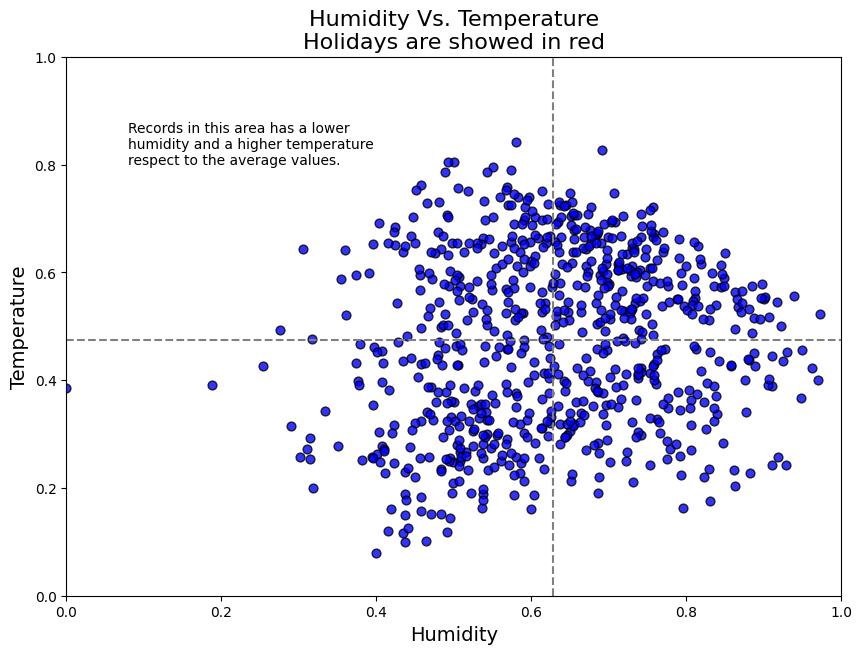

In [13]:
plt.figure(figsize=(10, 7))

plt.scatter(df.hum, df.atemp, c='b', alpha=0.8, edgecolors='k', s=40)

plt.title('Humidity Vs. Temperature\nHolidays are showed in red', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.hlines(np.mean(df.atemp), 0, 1, 'grey', linestyles='--')
plt.vlines(np.mean(df.hum), 0, 1, 'grey', linestyles='--')
plt.text(
    0.08, 0.8,
    'Records in this area has a lower\nhumidity and a higher temperature\nrespect to the average values.'
)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

Here we want to further modify the scatter plot by changing circle styles based on some conditions:
- color: red, alpha: 0.8 and size: 40 if the record is a holiday
- color: blue, alpha: 0.3 and size: 28 if the record is NOT a holiday
- color: green , alpha: 0.3 and size: 28 if s non holiday point has hum less than average and atemp higher than the average




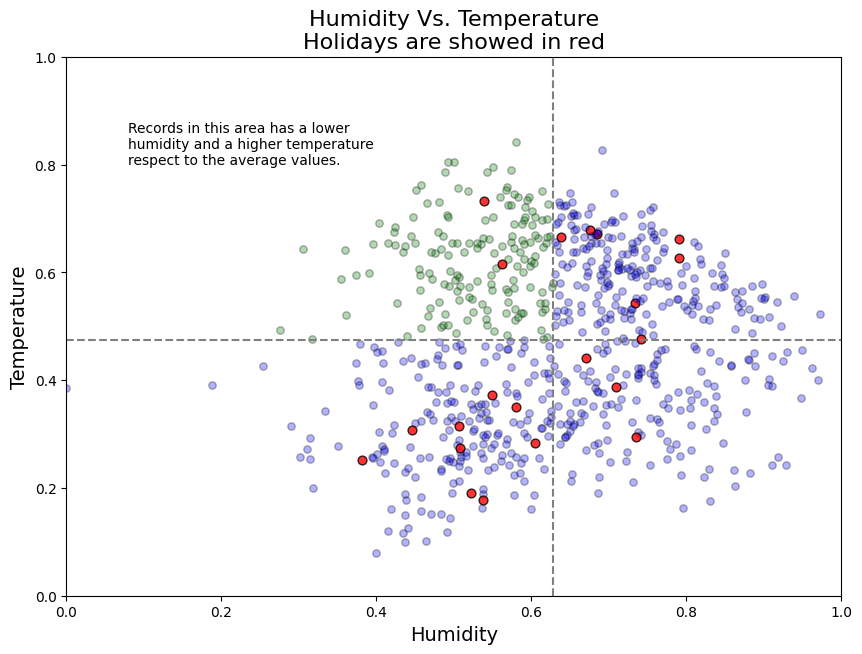

In [14]:
plt.figure(figsize=(10, 7))

for i in range(len(df)):
    if df.holiday[i] == 0:
        # if it's not holiday
        alpha = 0.3
        size = 28

        # checking for the green area
        if df.hum[i] < np.mean(df.hum) and df.atemp[i] > np.mean(df.atemp):
            c = 'g'
        else:
            c = 'b'
    else:
        # in case of holiday
        c = 'r'
        alpha = 0.8
        size = 40
        
    plt.scatter(df.hum[i],
                df.atemp[i],
                c=c,
                alpha=alpha,
                edgecolors='k',
                s=size)

plt.title('Humidity Vs. Temperature\nHolidays are showed in red', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.hlines(np.mean(df.atemp), 0, 1, 'grey', linestyles='--')
plt.vlines(np.mean(df.hum), 0, 1, 'grey', linestyles='--')
plt.text(
    0.08, 0.8,
    'Records in this area has a lower\nhumidity and a higher temperature\nrespect to the average values.'
)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.show()

## Time-Series (line plot)

Here we wan to plot the historical changes in the felt temperature from 2011 to 2013, considering the following requirements:

- A basic line plot that shows the changes in the temperature 
- Each day should be also indicated by a blue circle (size:10, alpha: 0.2)
- Outlier days should be indicated by red circles (size:23, alpha: 1)
- Add a blue line that shows the rolling average (for 30 days) of temperature data
- For each outlier day, add a red line with a height equal to 0.05

<img src="../Images/TS_final.png" width="1000">

In [39]:
def is_outlier(i):
    """
    Given the index of a day, return True or False
    if day is a outlier or not
    """
    a = df.atemp[i] < np.mean(df.atemp[i-3: i+4]) * 0.65
    b = df.atemp[i] > np.mean(df.atemp[i-3: i+4]) * 1.4
    return  a or b

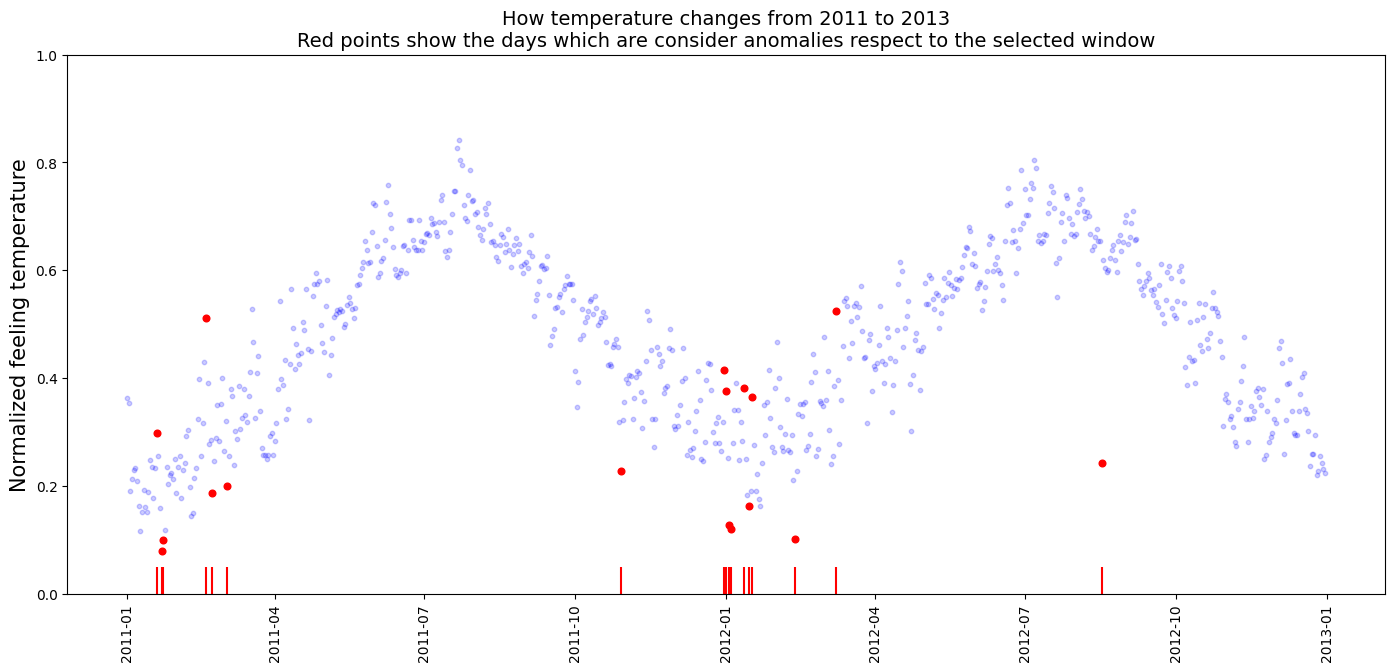

In [40]:
plt.figure(figsize=(17, 7))

for i in range(len(df)):
    if is_outlier(i):
        col = 'r'
        size = 23
        alpha = 1
        # plotting rugs
        plt.vlines(df.dteday[i], 0, 0.05, 'r')
    else:
        col = 'b'
        size = 10
        alpha = 0.2

    plt.scatter(df.dteday[i], df.atemp[i], c=col, alpha=alpha, s=size)

# plotting the main plot

plt.title(
    'How temperature changes from 2011 to 2013\nRed points show the days which are consider anomalies respect to the selected window',
    fontsize=14)

# rotating the x labels
plt.xticks(rotation=90)

plt.ylim(0, 1)
plt.ylabel('Normalized feeling temperature', fontsize=15)
plt.show()

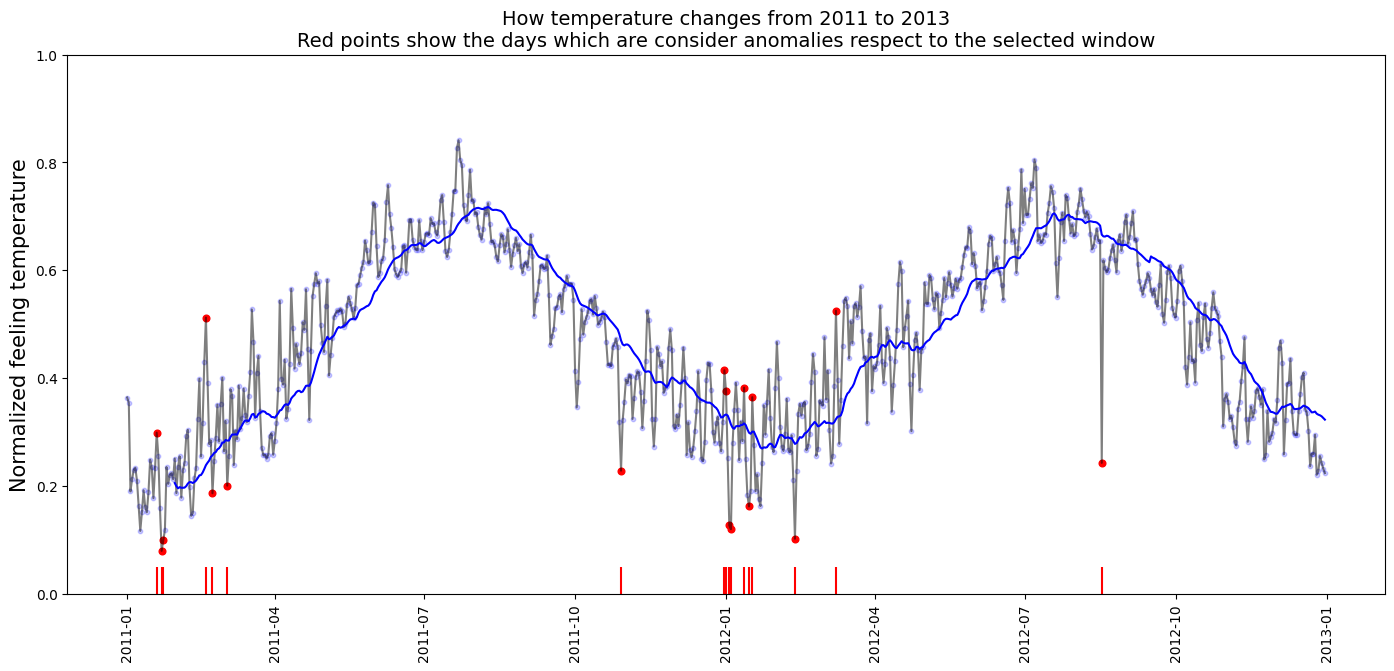

In [52]:
plt.figure(figsize=(17, 7))

for i in range(len(df)):

    if is_outlier(i):
        col = 'r'
        size = 23
        alpha = 1
        # plotting rugs
        plt.vlines(df.dteday[i], 0, 0.05, 'r')
    else:
        col = 'b'
        size = 10
        alpha = 0.2

    plt.scatter(df.dteday[i], df.atemp[i], c=col, alpha=alpha, s=size)

# plotting the main plot
plt.plot(df.dteday, df.atemp, color='k', alpha=0.5)

# plotting the moving average
# creating a moving average for 1 month
df['roll_avg'] = df.atemp.rolling(window=30).mean()
plt.plot(df.dteday, df.roll_avg, color='blue')

plt.title(
    'How temperature changes from 2011 to 2013\nRed points show the days which are consider anomalies respect to the selected window',
    fontsize=14)

# rotating the x labels
plt.xticks(rotation=90)

plt.ylim(0, 1)
plt.ylabel('Normalized feeling temperature', fontsize=15)
plt.show()

## Subplots

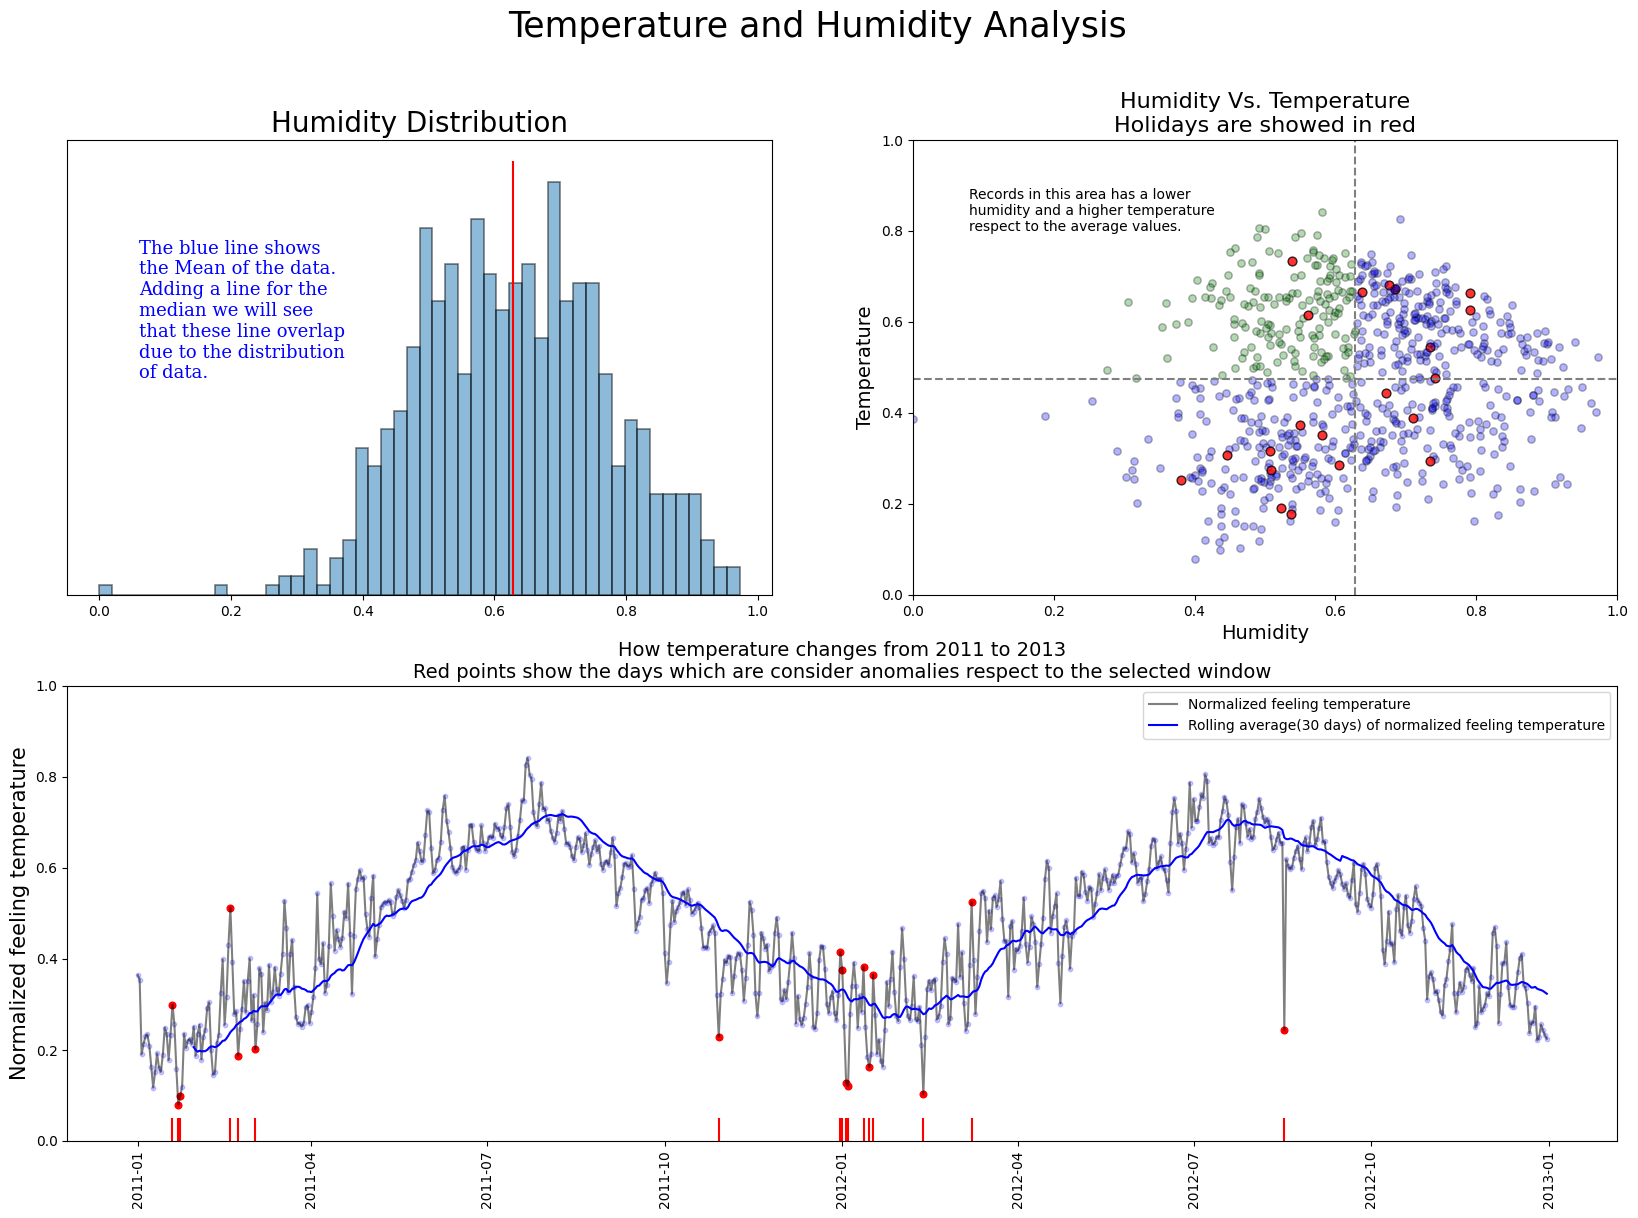

In [44]:
plt.figure(figsize=(20, 13))
plt.suptitle('Temperature and Humidity Analysis', fontsize=25)

# -------------HISTOGRAM -------------------------

# put the graph in the 1st position of a 2 X 2 grid
plt.subplot(2, 2, 1)

plt.hist(df.hum, bins=50, alpha=0.5, edgecolor='black', linewidth=1.2)
plt.title('Humidity Distribution', fontsize=20)
xmin, xmax, ymin, ymax = plt.axis()
#plt.vlines(np.median(df.hum), 0, ymax, 'r')
plt.vlines(np.mean(df.hum), 0, ymax, 'r')
font = {
    'family': 'serif',
    'color': 'blue',
    'weight': 'normal',
    'size': 13,
}
plt.text(
    0.06,
    ymax * 0.5,
    'The blue line shows\nthe Mean of the data.\nAdding a line for the\nmedian we will see\nthat these line overlap\ndue to the distribution\nof data.',
    fontdict=font)
#plt.text(np.median(df.hum)*1.02, ymax, 'Median value', fontdict=font)
plt.yticks([])

# -------------SCATTER PLOT -------------------------
# put the graph in the 2nd position of a 2 X 2 grid
plt.subplot(222)
#plt.figure(figsize=(10, 7))

for i in range(len(df)):
    if df.holiday[i] == 0:
        # if it's not holiday
        alpha = 0.3
        size = 28

        # checking for the green area
        if df.hum[i] < np.mean(df.hum) and df.atemp[i] > np.mean(df.atemp):
            c = 'g'
        else:
            c = 'b'
    else:
        # in case of holiday
        c = 'r'
        alpha = 0.8
        size = 40
    plt.scatter(df.hum[i],
                df.atemp[i],
                c=c,
                alpha=alpha,
                edgecolors='k',
                s=size)

plt.title('Humidity Vs. Temperature\nHolidays are showed in red', fontsize=16)
plt.xlabel('Humidity', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.hlines(np.mean(df.atemp), 0, 1, 'grey', linestyles='--')
plt.vlines(np.mean(df.hum), 0, 1, 'grey', linestyles='--')
plt.text(
    0.08, 0.8,
    'Records in this area has a lower\nhumidity and a higher temperature\nrespect to the average values.'
)
plt.ylim(0, 1)
plt.xlim(0, 1)

# -------------TIMES SERIES -------------------------
# put the graph in the 3rd and 4th positions of a 2 X 2 grid
plt.subplot(2, 2, (3, 4))

for i in range(len(df)):

    if df.atemp[i] < np.mean(
            df.atemp[i - 3:i + 4]) * 0.65 or df.atemp[i] > np.mean(
                df.atemp[i - 3:i + 4]) * 1.4:
        col = 'r'
        size = 23
        alpha = 1
        plt.vlines(df.dteday[i], 0, 0.05, 'r')
    else:
        col = 'b'
        size = 10
        alpha = 0.2
    plt.scatter(df.dteday[i], df.atemp[i], c=col, alpha=alpha, s=size)

plt.plot(df.dteday,
         df.atemp,
         color='k',
         alpha=0.5,
         label='Normalized feeling temperature')

# plotting the moving average
# creating a moving average for 1 month
df['roll_avg'] = df.atemp.rolling(window=30).mean()
plt.plot(df.dteday,
         df.roll_avg,
         color='blue',
         label='Rolling average(30 days) of normalized feeling temperature')

plt.title(
    'How temperature changes from 2011 to 2013\nRed points show the days which are consider anomalies respect to the selected window',
    fontsize=14)
plt.xticks(rotation=90)

plt.ylim(0, 1)
plt.ylabel('Normalized feeling temperature', fontsize=15)

# adding legend box
plt.legend()

# saving the result as a png image
plt.savefig('final_plot.png', dpi=300)
plt.show()